# 📘 Next-Generation Spam Filtering - BERT 中文分類模型

## 📦 第 1 部分：匯入必要套件

In [1]:

import pandas as pd
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import matplotlib.pyplot as plt
import seaborn as sns


d:\文大專題\program\Lingspam\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 📑 第 2 部分：讀取與前處理資料

In [2]:

df = pd.read_csv("test.csv")
df["text"] = df["subject"].fillna('') + " " + df["message"].fillna('')

# 資料預處理：移除網址、符號、轉小寫
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^\u4e00-\u9fffa-zA-Z0-9\s]', '', text)
    return text.lower().strip()

df["text_clean"] = df["text"].apply(clean_text)

# 顯示前處理前後前 5 筆
df[["text", "text_clean"]].head()


,text,text_clean
0,The FuelCell Rebel 全新顏色\n\nNew Balance\nhttps:...,the fuelcell rebel 全新顏色\n\nnew balance\n\n\n\n...
1,1111人力銀行推薦 -【桃園台茂店【涮乃葉】兼職人員及大專院校實習】 \n \n ...,1111人力銀行推薦 桃園台茂店涮乃葉兼職人員及大專院校實習 \n \n 轉寄履...
2,陳任璿-2025/03/16 履歷職缺配對通知 \n 職缺配對 ...,陳任璿20250316 履歷職缺配對通知 \n 職缺配對 ...
3,你的 Apple 開立發票通知 \n \n開立發票通知\n\n\n A...,你的 apple 開立發票通知 \n \n開立發票通知\n\n\n a...
4,大谷翔平，準備好續集 The Ohtani Signature Collection\n\n...,大谷翔平準備好續集 the ohtani signature collection\n\nn...


## 📊 第 3 部分：類別統計與可視化

C:\Users\user\AppData\Local\Temp\ipykernel_29212\3690294973.py:9: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_29212\3690294973.py:9: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_29212\3690294973.py:9: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_29212\3690294973.py:9: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 240

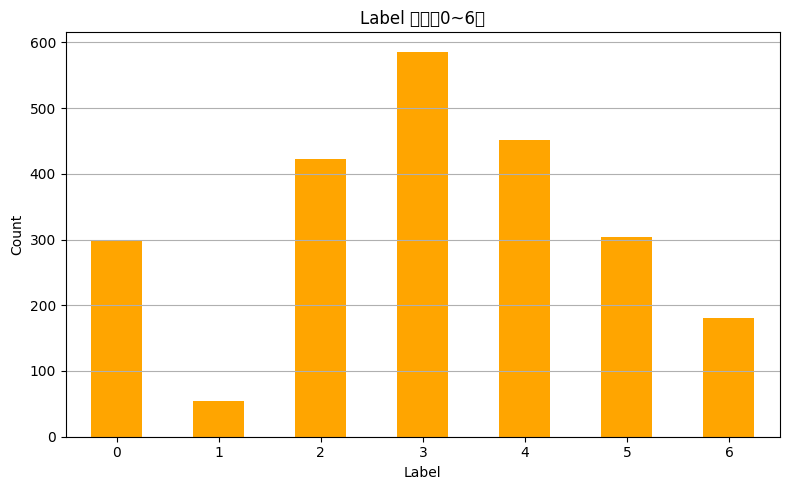

In [3]:

label_counts = df["label"].value_counts().sort_index()
plt.figure(figsize=(8,5))
label_counts.plot(kind="bar", color="orange")
plt.title("Label 分布（0~6）")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis="y")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## ✂️ 第 4 部分：Tokenizer 編碼與資料分割

In [4]:

label_encoder = LabelEncoder()
df["encoded_label"] = label_encoder.fit_transform(df["label"])

X_train, X_test, y_train, y_test = train_test_split(
    df["text_clean"], df["encoded_label"], test_size=0.2, random_state=42, stratify=df["encoded_label"]
)

tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
MAX_LEN = 128
BATCH_SIZE = 16

def encode_texts(texts, tokenizer, max_len):
    return tokenizer(
        list(texts),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

train_enc = encode_texts(X_train, tokenizer, MAX_LEN)
test_enc = encode_texts(X_test, tokenizer, MAX_LEN)

# 顯示 tokenizer 處理結果 sample
tokenizer.decode(train_enc["input_ids"][0])


d:\文大專題\program\Lingspam\.venv\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


'[CLS] 凱 基 證 券 投 資 人 最 關 心 的 資 產 配 置 要 角 海 外 債 接 下 來 如 何 布 局 贈 獎 通 知 投 資 朋 友 們 好 關 稅 話 題 持 續 延 燒 資 金 大 量 湧 入 美 債 市 場 如 何 趁 勝 追 擊 抓 住 新 契 機 歡 迎 報 名 線 上 講 座 投 資 自 己 聚 焦 未 來 歡 迎 體 驗 台 股 模 擬 交 易 凱 基 證 券 股 份 有 限 公 司 客 服 專 線 0223890088 0800085005 智 能 客 服 地 址 台 北 市 明 水 路 [SEP]'

## 📦 第 5 部分：轉換成 TensorFlow Dataset

In [5]:

from collections import Counter

def print_counter(title, counter_dict):
    print(f"{title} 各類別數量：")
    for k in sorted(counter_dict):
        print(f"類別 {k}：{counter_dict[k]} 筆")
    print()

print_counter("全體資料集", Counter(df["label"]))
print_counter("訓練集", Counter(y_train))
print_counter("驗證集", Counter(y_test))


全體資料集 各類別數量：
類別 0：300 筆
類別 1：55 筆
類別 2：422 筆
類別 3：586 筆
類別 4：452 筆
類別 5：304 筆
類別 6：181 筆

訓練集 各類別數量：
類別 0：240 筆
類別 1：44 筆
類別 2：338 筆
類別 3：469 筆
類別 4：361 筆
類別 5：243 筆
類別 6：145 筆

驗證集 各類別數量：
類別 0：60 筆
類別 1：11 筆
類別 2：84 筆
類別 3：117 筆
類別 4：91 筆
類別 5：61 筆
類別 6：36 筆



In [6]:

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_enc),
    to_categorical(y_train, num_classes=7)
)).shuffle(1000).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_enc),
    to_categorical(y_test, num_classes=7)
)).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.AUTOTUNE)


## 🧠 第 6 部分：建立並編譯模型

In [7]:

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-chinese", num_labels=7)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
model.summary()


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  102267648 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  5383      
                                                                 
Total params: 102,273,031
Trainable params: 102,273,031
Non-trainable params: 0
_________________________________________________________________


## 🔁 第 7 部分：模型訓練

In [8]:

history = model.fit(train_dataset, epochs=3, validation_data=test_dataset)


Epoch 1/3
115/115 [==============================] - 43s 322ms/step - loss: 0.5726 - accuracy: 0.8587 - val_loss: 0.1514 - val_accuracy: 0.9643
Epoch 2/3
115/115 [==============================] - 35s 308ms/step - loss: 0.1296 - accuracy: 0.9728 - val_loss: 0.1110 - val_accuracy: 0.9732
Epoch 3/3
115/115 [==============================] - 35s 301ms/step - loss: 0.0684 - accuracy: 0.9842 - val_loss: 0.0806 - val_accuracy: 0.9777


## 📈 第 8 部分：訓練過程視覺化

d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36942 (\N{CJK UNIFIED IDEOGRAPH-904E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  

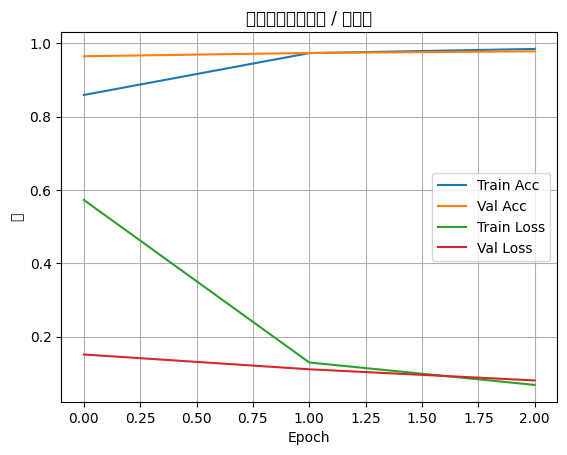

In [9]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("訓練過程（準確率 / 損失）")
plt.xlabel("Epoch")
plt.ylabel("值")
plt.legend()
plt.grid(True)
plt.show()


## 📊 第 9 部分：模型評估與混淆矩陣

28/28 [==============================] - 3s 87ms/step
              precision    recall  f1-score   support

           0     1.0000    0.9500    0.9744        60
           1     1.0000    0.9091    0.9524        11
           2     0.9878    0.9643    0.9759        84
           3     1.0000    1.0000    1.0000       113
           4     0.9888    0.9888    0.9888        89
           5     0.9500    1.0000    0.9744        57
           6     0.8649    0.9412    0.9014        34

    accuracy                         0.9777       448
   macro avg     0.9702    0.9648    0.9667       448
weighted avg     0.9789    0.9777    0.9779       448



d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38499 (\N{CJK UNIFIED IDEOGRAPH-9663}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\文大專題\program\Lingspam\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from current font.
  

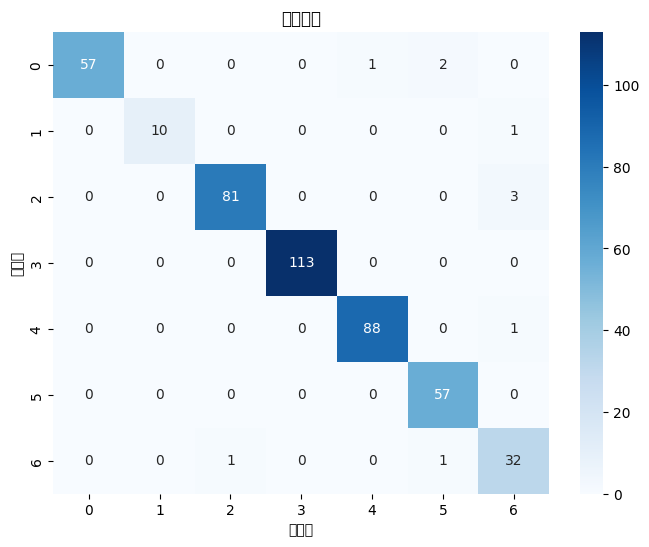

In [10]:

y_pred_logits = model.predict(test_dataset).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()
y_true = tf.concat([y for _, y in test_dataset], axis=0)
y_true = tf.argmax(y_true, axis=1).numpy()

print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("混淆矩陣")
plt.xlabel("預測值")
plt.ylabel("實際值")
plt.show()
